In [15]:
import numpy as np
import time
import cv2
# from kalman_filter.EKF import ExtendedKalmanFilter
# from kalman_filter.kalman import kalman_filter
import dependencies.constants_robot as cst
import matplotlib.pyplot as plt
from kalman_filter.Filter_class import ExtendedKalmanFilter
from kalman_filter.Filter_func import kalman_func

In [16]:
def f(x, dt):
    angle = x[2]
    dcosA = dt*np.cos(angle)
    dsinA = dt*np.sin(angle)

    f = np.array([
                    [      1,       0,     0, 0, 0],
                    [      0,       1,     0, 0, 0],
                    [      0,       0,     1, 0, 0],
                    [dcosA/2, dsinA/2,  dt/cst.L, 1, 0],
                    [dcosA/2, dsinA/2, -dt/cst.L, 0, 1]])
    
    x_update = x @ f
    return x_update

In [17]:
x_ini = np.array([0, 0, 0, 0, 0])
dt = 0.1
left_wheel =  np.concatenate(([30]*10, [30]*10, [15]*10, [30]*10))
right_wheel = np.concatenate(([30]*10, [15]*10, [30]*10, [30]*10))

In [18]:
position = np.zeros((len(left_wheel), 3))
x_update = x_ini
for i in range(len(left_wheel)-1):
    x_current = x_update
    x_current[3] = left_wheel[i] /3
    x_current[4] = right_wheel[i]/3
    x_update = f(x_current, dt)
    position[i+1] = x_update[0:3]

In [19]:
# simulate noises on the position
position_wheel_noisy = position.copy()
left_wheel_noisy = left_wheel + np.random.normal(0, 0.01, len(left_wheel))
right_wheel_noisy = right_wheel + np.random.normal(0, 0.01, len(left_wheel))
x_update = x_ini
for i in range(len(left_wheel)-1):
    x_current = x_update
    x_current[3] = left_wheel_noisy[i]/3
    x_current[4] = right_wheel_noisy[i]/3
    x_update = f(x_current, dt)
    position_wheel_noisy[i+1] = x_update[0:3]

In [20]:
# do the kalman filter
position_noisy = position.copy()
position_noisy[1:, 0] += np.random.normal(0, 0.01, len(left_wheel)-1)
position_noisy[1:, 1] += np.random.normal(0, 0.01, len(left_wheel)-1)
position_filtered = np.zeros((len(left_wheel), 3))
ekf = ExtendedKalmanFilter(x_ini[0:3])
for i in range(len(left_wheel)):
    if i > 17:
        x_update, x_variance, kidnapping = kalman_func(ekf, None, np.array([left_wheel_noisy[i], right_wheel_noisy[i]]), dt=0.1)
        # x_update, kidnapping = kalman_filter(ekf, None,np.array([left_wheel_noisy[i], right_wheel_noisy[i]]), dt=0.1)
    else:
        x_update, x_variance, kidnapping = kalman_func(ekf, position_noisy[i], np.array([left_wheel_noisy[i], right_wheel_noisy[i]]), dt=0.1)
        # x_update, kidnapping = kalman_filter(ekf, position_noisy[i],np.array([left_wheel_noisy[i], right_wheel_noisy[i]]), dt=0.1)
    position_filtered[i] = x_update[0:3]
    # x_update, kidnapping = kalman_filter(ekf, None,np.array([left_wheel_noisy[i], right_wheel_noisy[i]]), dt=0.1)
    # position_filtered[i] = x_update[0:3]
    

No vision, only encoder
No vision, only encoder
No vision, only encoder
No vision, only encoder
No vision, only encoder
No vision, only encoder
No vision, only encoder
No vision, only encoder
No vision, only encoder
No vision, only encoder
No vision, only encoder
No vision, only encoder
No vision, only encoder
No vision, only encoder
No vision, only encoder
No vision, only encoder
No vision, only encoder
No vision, only encoder
No vision, only encoder
No vision, only encoder
No vision, only encoder
No vision, only encoder


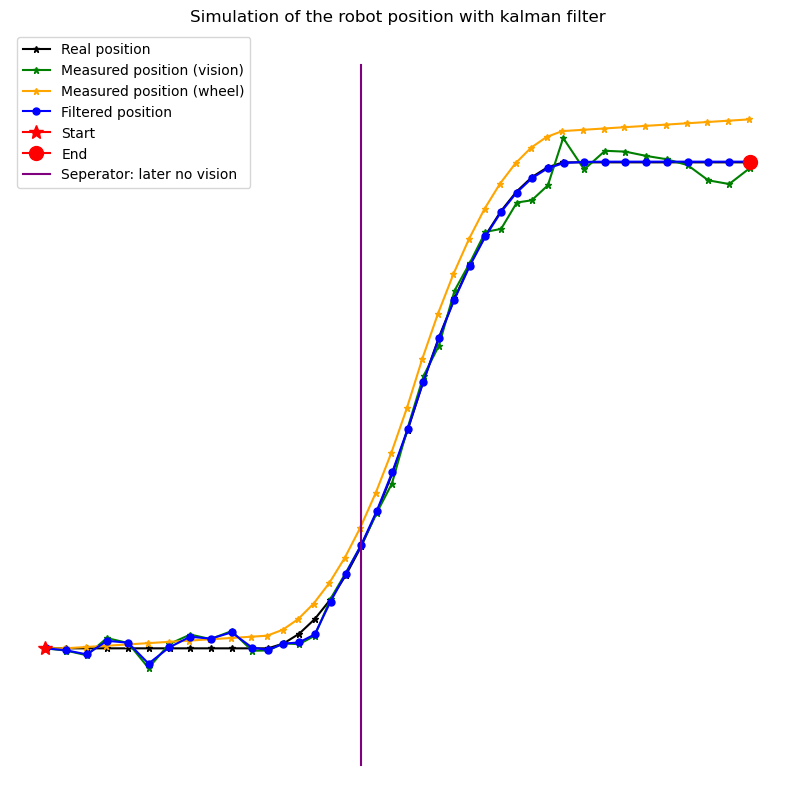

In [21]:
plt.style.use('default')
plt.figure(figsize=(10,10))
plt.plot(position[:,0], position[:,1], marker='*', markersize=5, color="black", label="Real position")
plt.plot(position_noisy[:,0], position_noisy[:,1], marker='*', markersize=5, color="green", label="Measured position (vision)")
plt.plot(position_wheel_noisy[:,0], position_wheel_noisy[:,1], marker='*', markersize=5, color="orange", label="Measured position (wheel)")
plt.plot(position_filtered[:,0], position_filtered[:,1], marker='o', markersize=5, color="blue", label="Filtered position")
plt.plot(position[0,0], position[0,1], marker='*', markersize=10, color="red", label="Start")
plt.plot(position[-1,0], position[-1,1], marker='o', markersize=10, color="red", label="End")
plt.title("Simulation of the robot position with kalman filter")
# draw a straight line at the 15th point to show the no vision part
plt.plot([position[17,0]]*10, np.linspace(-0.1, 0.5, 10), color="purple", label="Seperator: later no vision")
plt.axis('off')
plt.legend()